# Decision Tree

In this section, we will implement the decision tree algorithm using Python's Scikit-Learn library. In the following examples we'll solve both 
classification as well as regression problems using the decision tree.

#### References

https://www.kaggle.com/code/aysenur95/clustering-anuran-calls-mfccs/notebook#EDA

https://www.kaggle.com/code/kerneler/starter-anuran-calls-mfccs-data-set-940128a2-6

In [102]:
# Load libraries
import pandas as pd # For data manipulation
import numpy as np # For data manipulation|

In [103]:
df = pd.read_csv('frogs_mfcc.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,ScinaxRuber


### Data visualization

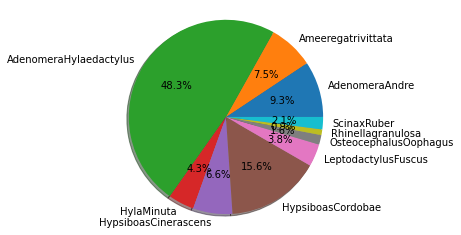

In [104]:
import matplotlib.pyplot as plt

names = list(df["Species"].unique())
sizes = [df["Species"].value_counts()[unique_class]*100/len(df["Species"]) for unique_class in names]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=names, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

In [105]:
# Divide into attributes and label
X = df.drop('Species', axis=1)
y = df['Species']

### Feature Selection

In this case, we used ANOVA feature selection method to select our features. This is because ANOVA feature selection works well with numerical input, but categorical output. We chose to have a maximum of 19 features selected is because after testing, we found out that roughly 19 features produces the best accuracy for our model.

#### Reference
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ 

In [106]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif, k=19)
X = feature_selection.fit_transform(X, y)

In [107]:
# Split dataset into training set and test set
# Split up 20% of the data in to the test set and 80% for training
from sklearn.model_selection import train_test_split # For splitting the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Finding the optimal depth of model

To find the optimal depth, we determine the error rate for a range of k values from 1 to 19. After that we plotted two graph to visualize the data.

Two graphs were plotted
1. Error rate against depth
2. Accuracy against depth

From the graphs generated, we can see that the in which depth the model performs best.

Minimum error: 0.05072967338429465 at depth = 11
Maximum accuracy: 0.9492703266157053 at depth = 11


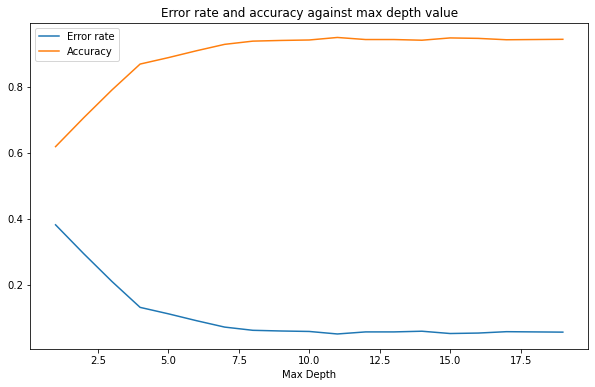

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

error_rate = []
depth_accuracy = []
for i in range(1, 20):
    model = DecisionTreeClassifier(criterion="gini", max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    depth_accuracy.append(metrics.accuracy_score(y_test, predictions))
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, label="Error rate")
plt.plot(range(1, 20), depth_accuracy, label="Accuracy")
plt.title("Error rate and accuracy against max depth value")
plt.xlabel("Max Depth")
plt.legend()
plt.savefig("error_rate_against_depth.png")
print("Minimum error:", min(error_rate), "at depth =", error_rate.index(min(error_rate))+1)
print("Maximum accuracy:", max(depth_accuracy), "at depth =", depth_accuracy.index(max(depth_accuracy))+1)

### Training and predicting with the model

After finding the optimal k value, we can now start training the model with the optimal k value from the previous part.

After that, we will perform predictions with the model.

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth=error_rate.index(min(error_rate))+1, min_samples_leaf=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Model report

This code snippet prints the classification report as well as the confusion matrix of the KNN model.

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.92      0.92      0.92       133
AdenomeraHylaedactylus       0.99      0.99      0.99       720
    Ameeregatrivittata       0.90      0.97      0.93       102
            HylaMinuta       0.69      0.72      0.70        64
  HypsiboasCinerascens       0.96      0.93      0.95        84
     HypsiboasCordobae       0.94      0.90      0.92       219
   LeptodactylusFuscus       0.83      0.91      0.87        55
 OsteocephalusOophagus       0.78      0.70      0.74        20
     Rhinellagranulosa       0.75      0.82      0.78        11
           ScinaxRuber       0.81      0.81      0.81        31

              accuracy                           0.94      1439
             macro avg       0.86      0.87      0.86      1439
          weighted avg       0.94      0.94      0.94      1439

[[122   0   2   7   0   1   0   1   0   0]
 [  0 712   0   5   1   1   0   0   0   1]
 [  2   0  99  